## Exploring a real-life dataset

Next, we use our knowledge to analyse a real-life dataset about death penalties. We will work through a detailed example of data exploration and analyse a very small part of the complex question of racism in the USA. 

The data deathpenalty_df covers judgements of defendants in cases of multiple murders in Florida between 1976 and 1987. The cases all have features that (a) describe whether the death penalty was handed out (where 0 refers to no, 1 to yes), (b) the race of the defendant and (c) the race of the victim (black is referred as 0, white is 1). 

Load the dataset by running the code below. Later on we will discuss in detail how you can load your own data in a dataframe, but if you are already curious check out: https://www.w3schools.com/python/pandas/pandas_csv.asp.

In [1]:
import pandas as pd
import numpy as np

deathpenalty_df = pd.read_csv('https://tinyurl.com/4ejjhx94')

By typing in ```deathpenalty_df.head()```, we can see the first couple of cases/rows. What types of columns do you see?

In [2]:
deathpenalty_df.head()

,DeathPenalty,VictimRace,DefendantRace,Freq
0,0,0,0,139
1,1,0,0,4
2,0,1,0,37
3,1,1,0,11
4,0,0,1,16


By entering ```deathpenalty_df.tail()```, we can see the last couple of cases/rows.

In [3]:
deathpenalty_df.tail()

,DeathPenalty,VictimRace,DefendantRace,Freq
3,1,1,0,11
4,0,0,1,16
5,1,0,1,0
6,0,1,1,414
7,1,1,1,53


Next, we will try to ask the data a few simple questions. With the function np.mean(), you can retrieve the average of a series of numbers.

We want to know the average of the frequency column by selecting it from the dataframe. The average frequency of judgements is found by entering ```np.mean(deathpenalty_df['Freq'])```. Try it.

In [4]:
np.mean(deathpenalty_df['Freq'])

84.25

The NumPy mean function is very useful to understand data. When something is deemed average, it falls somewhere between the extreme ends of the scale. An average student might have marks falling in the middle of their classmates; an average weight is neither unusually light nor heavy. An average item is typical, and not too unlike the others in the group. You might think of an average as an exemplar or even an expectation/tendency if you do not anything else.

median is another function like mean that summarizes a whole dataset by delivering a central tendency. Like mean, it identifies a value that falls in the middle of a set of data. median splits the upper 50% of a data from the lower 50%. It thus delivers the value that occurs halfway if we order a list of values. How do you get the median frequency of judgements? Hint: The NumPy function is called np.median.

In [5]:
np.median(deathpenalty_df['Freq'])

26.5

There is a significant diffference between the mean and medium value. What does it mean? Check out https://www.datascienceblog.net/post/basic-statistics/mean_vs_median/.

What is the lowest number of judgements ```(np.min)```? Assign the value to min_freq, please. Print out min_freq, too.

In [6]:
min_freq = np.min(deathpenalty_df['Freq'])
min_freq

0

What is the highest number of judgements (```np.max```)? Assign the value to max_freq, please. Print out max_freq, too.

In [7]:
max_freq = np.max(deathpenalty_df['Freq'])
max_freq

414

What kind of case combinations had the lowest numbers of judgements? We could use min_freq and max_freq to select the specific rows from deathpenalty_df. Do you know how? 

Try it for the highest number of judgements (```max_freq```).

In [8]:
deathpenalty_df[deathpenalty_df['Freq'] == max_freq]

,DeathPenalty,VictimRace,DefendantRace,Freq
6,0,1,1,414


This selection is so common that we can optain these cases using functions that come with Pandas. 

To get the row with the smallest value for Freq, type `deathpenalty_df.nsmallest(1, 'Freq')`. The first argument specifies the numnber of items to retrieve and the second the column.

In [9]:
deathpenalty_df.nsmallest(1, 'Freq')

,DeathPenalty,VictimRace,DefendantRace,Freq
5,1,0,1,0


Onwards ... 

Which case combinations had the highest number of judgements? You just need to change the function to ```deathpenalty_df.nlargest```.

In [10]:
deathpenalty_df.nlargest(1, 'Freq')

,DeathPenalty,VictimRace,DefendantRace,Freq
6,0,1,1,414


This is already very interesting. While whites murdering white is the by far most common case, there were no deapth penalities here.

min and max are measures of the diversity or spread of data. Knowing about the spread provides a sense of the data’s highs and lows, and whether most values are like or unlike the mean and median. The span between the minimum and maximum value is known as the range. Calculate the range next using `max_freq - min_freq`.

In [11]:
max_freq - min_freq

414

The data is very spread out ...

To know more about the distribution of data, np.quantile comes in handy. The function defines cut-off points dividing observations. It is the function that helps us calculate the n-th quantile of the data. 

Check out ```np.quantile(deathpenalty_df['Freq'], [0.25,0.5, 0.75, 1])```. The first argument is the column and the second argument is the list of the percentage cut-off points at 25%, 50%, 75% and 100%.

In [12]:
np.quantile(deathpenalty_df['Freq'], [0.25,0.5, 0.75, 1])

array([  9.25,  26.5 ,  74.5 , 414.  ])

The answer should read that 9.25 as frequency is the 25% cut-off, 26.5 the 50% cut-off, etc.

There are two more really useful data exploration functions in Python. The first one is describe. Try ```deathpenalty_df.describe()``` and see what is returned.

In [13]:
deathpenalty_df.describe()

,DeathPenalty,VictimRace,DefendantRace,Freq
count,8.000000,8.000000,8.000000,8.000000
mean,0.500000,0.500000,0.500000,84.250000
std,0.534522,0.534522,0.534522,140.663479
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.250000
50%,0.500000,0.500000,0.500000,26.500000
75%,1.000000,1.000000,1.000000,74.500000
max,1.000000,1.000000,1.000000,414.000000


```describes``` returns the value you just tried to find yourself! Oh, well. 

There is another Pandas function called ```info()```, which returns the structure of a dataframe. It is very useful to find out about columns and features of a dataset. Try ```deathpenalty_df.info()```.

In [14]:
deathpenalty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   DeathPenalty   8 non-null      int64
 1   VictimRace     8 non-null      int64
 2   DefendantRace  8 non-null      int64
 3   Freq           8 non-null      int64
dtypes: int64(4)
memory usage: 384.0 bytes


Summary statistics work only with what in statistics is called numerical data, which is basically anything measured in numbers. Freq is a numerical column.

Alternatively, if data is represented by a set of categories, it is called categorical or nominal. In Python, we can compare categorical features by counting the values of the VictimRace to see how often each race occurs by typing ```deathpenalty_df.value_counts('VictimRace')```. You will see that both victim races are equally represented.

BTW: 'race' is a highly contested idea, and we should be more careful than the data we use, which assigns people to two very simplified categories. Discussing such constraint should be part of your own critical data analysis.

In [15]:
deathpenalty_df.value_counts('VictimRace')

VictimRace
0    4
1    4
dtype: int64

We are only getting warm. Let’s make this all a little bit more complicated. 

We want to know how many 'black' or 'white' defandants received the death penalty. 

Remember that a black person is represented by 0 and a white by 1. A death penalty was handed out if the column DeathPenalty equals 1, with 0 otherwise. 

Let’s first create a new dataframe black_and_deathpenalty, which contains black defendants which received the death penalty by using deathpenalty_df.loc[]. It is a bit complicated: ```black_and_deathpenalty = deathpenalty_df.loc[(deathpenalty_df['DefendantRace'] == 0) & (deathpenalty_df['DeathPenalty'] == 1)]```.

In [16]:
black_and_deathpenalty = deathpenalty_df.loc[(deathpenalty_df['DefendantRace'] == 0) & (deathpenalty_df['DeathPenalty'] == 1)]

Similarly, we can get the white defendants who received the death penalty. Get the subset and assign it to white_and_deathpenalty.

In [17]:
white_and_deathpenalty = deathpenalty_df.loc[(deathpenalty_df['DefendantRace'] == 1) & (deathpenalty_df['DeathPenalty'] == 1)]

Overall, we want to compare the likelihood of white and black defendants to receive the death penalty. In order to achieve this, the next step is to find out about the overall number of black people who received the death penalty. You can get this with the sum function, which we have already met and assign it to n_black_deathpenalty. Run ```n_black_deathpenalty = black_and_deathpenalty['Freq'].sum()```. Print out n_black_deathpenalty.

In [18]:
n_black_deathpenalty = black_and_deathpenalty['Freq'].sum()
n_black_deathpenalty

15

Next, find those whites, which were given a death penalty. Assign to a new variable n_white_deathpenalty.

In [19]:
n_white_deathpenalty = white_and_deathpenalty['Freq'].sum()



What is therefore the proportion of black people receiving the death penalty? Remember you can get this by dividing the number of black defendants with the death penalty by the total number of defendants with the death penalty.

In [20]:
n_black_deathpenalty / (n_black_deathpenalty + n_white_deathpenalty)

0.22058823529411764

That’s quite a low percentage. Do we  not need to worry then about racial biases in the judgements? What other information do we need to come to such a conclusion? Let’s find out next.

Proportionally, how many of the death penalties handed out to black people were for killing a white person? 

The expression ```black_and_deathpenalty.loc[(black_and_deathpenalty['VictimRace'] == 1)]['Freq'] / n_black_deathpenalty``` is a bit complicated but gets the right result. Can you explain how?

In [21]:
black_and_deathpenalty.loc[(black_and_deathpenalty['VictimRace'] == 1)]['Freq'] / n_black_deathpenalty

3    0.733333
Name: Freq, dtype: float64

Finally, how likely is it that a white person killing a black person will receive the death penalty? Can you change the last expression? 

In [22]:
white_and_deathpenalty.loc[(white_and_deathpenalty['VictimRace'] == 0)]['Freq'] / n_white_deathpenalty

5    0.0
Name: Freq, dtype: float64

0 should be the answer though there were 53 death penalities for white people.

Out of 15 death penalties for black people, 73% were for killing a white person. While none of the 53 death penalties for white people in Florida were given for killing a black person. 

I hope you can see that there are many powerful functions to explore data directly in Python. Another really good way to explore data is not to ask direct questions but to summarize it with graphs and visualisations. Visualisations and graphs are easy to do with Python.

Try ```deathpenalty_df.boxplot('Freq')```? What do you see? Ask the Internet!

<AxesSubplot:>

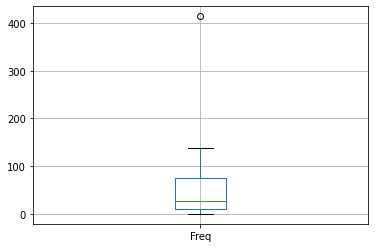

In [23]:
deathpenalty_df.boxplot('Freq')

The boxplot displays the centre and spread in a format that allows you to quickly obtain a sense of the behaviour of the data. The median is denoted by the line inside the box while the box around it stands for the spread. The boxplot shows one outlier (the top dot). Can you identify it in the dataset?

But this was just a taste of the visualisations that we focus on in the next sessions.